In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [44]:
data = pd.read_csv("test.csv")
data

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


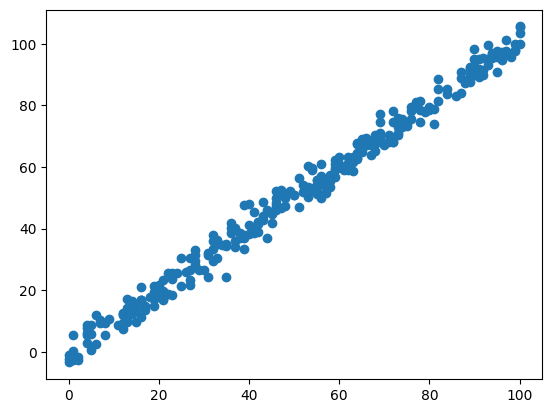

In [45]:
#Visualisation des données 
plt.scatter(data["x"],data["y"])
plt.show()

In [46]:
coVar = data.cov()
X_var = data["x"].var()
Y_bar = data["y"].mean()
X_bar = data["x"].mean()

In [47]:
coVar

,x,y
x,812.494303,824.141698
y,824.141698,845.150999


In [48]:
Coef = coVar["x"]["y"]/X_var
Ord = Y_bar - Coef*X_bar

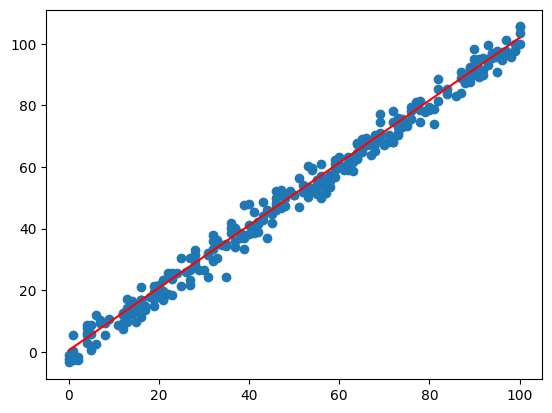

In [49]:
Y = []
sims = np.linspace(0,100,1000)
for i in sims:
    y = Coef*i - Ord
    Y.append(y)

#Visualisation des données 
plt.scatter(data["x"],data["y"])
plt.plot(sims,Y, c="red")
plt.show()


Regression à partir de données financières

In [50]:
import yfinance as yf 

In [51]:
Asset = ["AAPL","^GSPC"]
data = yf.download(Asset,"2010-01-01","2024-09-03",interval="1mo")["Adj Close"]

[*********************100%%**********************]  2 of 2 completed


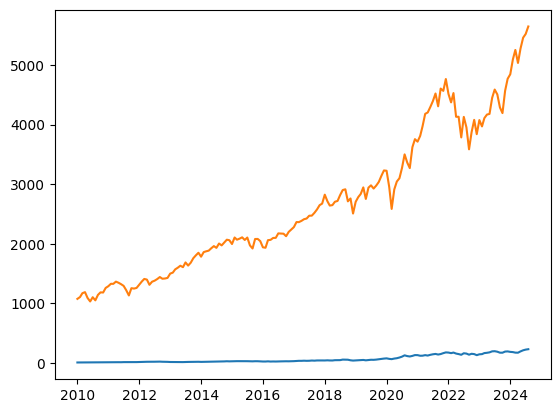

In [52]:
#Visualisation des données 
plt.plot(data)
plt.show()

In [53]:
data = np.log(data/data.shift(1))
data.dropna(inplace=True)
data

Ticker,AAPL,^GSPC
Date,,
2010-02-01,0.063347,0.028115
2010-03-01,0.138431,0.057133
2010-04-01,0.105280,0.014651
2010-05-01,-0.016256,-0.085532
2010-06-01,-0.021047,-0.055388
...,...,...
2024-04-01,-0.006729,-0.042506
2024-05-01,0.121059,0.046904
2024-06-01,0.092614,0.034082


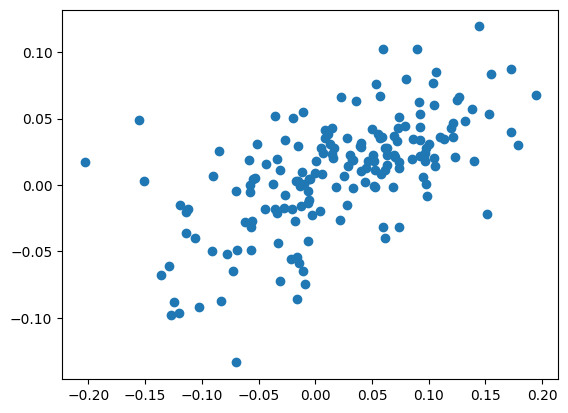

In [54]:
#Visualisation des données 
plt.scatter(data['AAPL'], data["^GSPC"])
plt.show()

In [55]:
VarCOV = data.cov()
VarCOV

Ticker,AAPL,^GSPC
Ticker,,
AAPL,0.005846,0.001993
^GSPC,0.001993,0.001785


In [63]:
Cov_AAPL_SnP = VarCOV["AAPL"]["^GSPC"]
SnP_var = VarCOV["^GSPC"]["^GSPC"]
Coef_1 = Cov_AAPL_SnP/SnP_var
Ord_1 = data["AAPL"].mean() - data["^GSPC"].mean() * Coef_1
print(Coef_1,Ord_1)

1.1163920703255228 0.010415289420381654


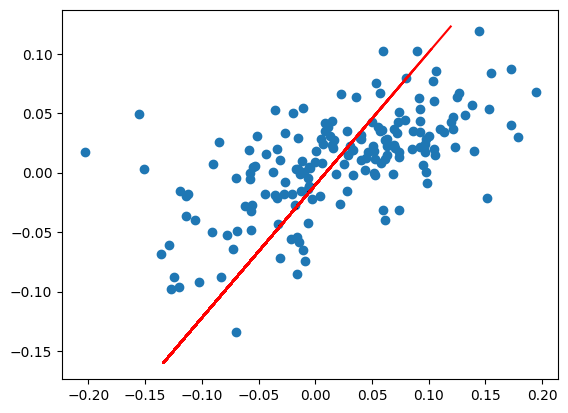

In [65]:
sims_1 = np.linspace(data["^GSPC"].min(),data["^GSPC"],1000)
aapl = []

for i in sims_1:
    e = Coef_1 * i - Ord_1
    aapl.append(e)

#Visualisation des données 
plt.scatter(data['AAPL'], data["^GSPC"])
plt.plot(sims_1,aapl,c= "red")
plt.show()